In [3]:

import matplotlib as plt
import numpy as np
import seaborn as sns

In [4]:

import pandas as pd
df = pd.read_excel("US Superstore data.xls")

**Data Cleaning**

In [5]:
df.shape


(9994, 21)

In [6]:
df.info


<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer 

In [7]:
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
# Drop the duplicated rows
df.drop_duplicates(inplace = True)

In [189]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
0      False     False       False      False      False        False   
1      False     False       False      False      False        False   
2      False     False       False      False      False        False   
3      False     False       False      False      False        False   
4      False     False       False      False      False        False   
...      ...       ...         ...        ...        ...          ...   
9989   False     False       False      False      False        False   
9990   False     False       False      False      False        False   
9991   False     False       False      False      False        False   
9992   False     False       False      False      False        False   
9993   False     False       False      False      False        False   

      Customer Name  Segment  Country   City  ...  Postal Cod

In [190]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Average lead time with ship mode categories

In [191]:
df['Avg_time'] = df['Ship Date'] - df['Order Date']

df.groupby(['Ship Mode'])
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Avg_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


**Best Year for Sales**

In [192]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Avg_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


In [193]:
def year(x):
    return x.split('-')[0]

In [194]:
df['Order Date'] = df['Order Date'].astype(str)

In [195]:
df['Year'] = df['Order Date'].apply(year)


In [196]:
df.groupby('Year')['Sales'].sum()

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

In [197]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

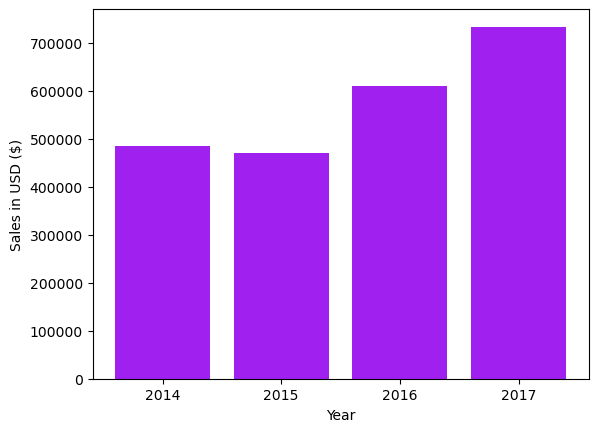

In [198]:
year = range(2014,2018)
plt.bar(year,df.groupby('Year')['Sales'].sum(),color='#A020F0')
plt.xticks(year)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Year')
plt.show()

Best month of sales

In [199]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Avg_time,Year,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,Nov
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,Nov
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,Jun
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,Oct
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,Oct


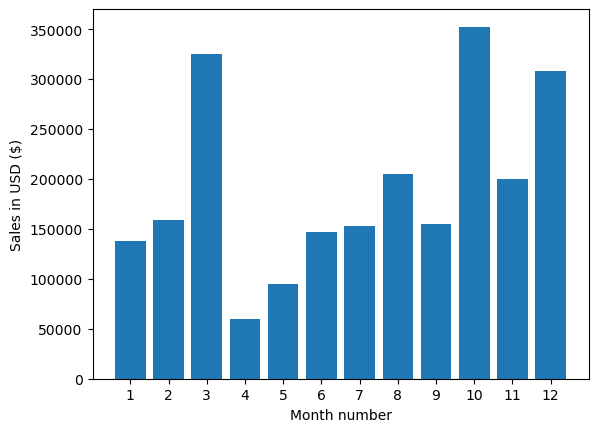

In [200]:
months = range(1,13)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


**Which Region has maximum orders**

In [201]:
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df['State'])):
    
    if df['State'][i] not in visited: 
        
        visited.append(df['State'][i])
          
        cnt += 1
print("No.of.unique values :",
      cnt)

No.of.unique values : 49


In [202]:
df.groupby('Region')['Region'].count()

Region
Central    2323
East       2848
South      1620
West       3203
Name: Region, dtype: int64

In [203]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Avg_time,Year,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,Nov
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,Nov
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,Jun
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,Oct
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,Oct


In [204]:
#removing duplicate orders to show order by regions
duplicate = df[df['Order ID'].duplicated(keep=False)]
duplicate.head(20)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Avg_time,Year,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,Nov
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,Nov
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,Oct
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,Oct
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5 days,2014,Jun
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,5 days,2014,Jun
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,5 days,2014,Jun
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,5 days,2014,Jun
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,5 days,2014,Jun
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,5 days,2014,Jun


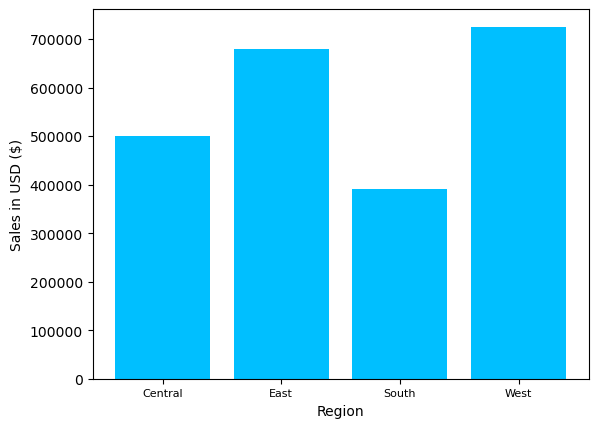

In [205]:
keys = [region for region, df in df.groupby(['Region'])]

plt.bar(keys,df.groupby(['Region']).sum()['Sales'],color='#00bfff')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Region')
plt.xticks(keys, size=8)
plt.show()

**Best State in Sales

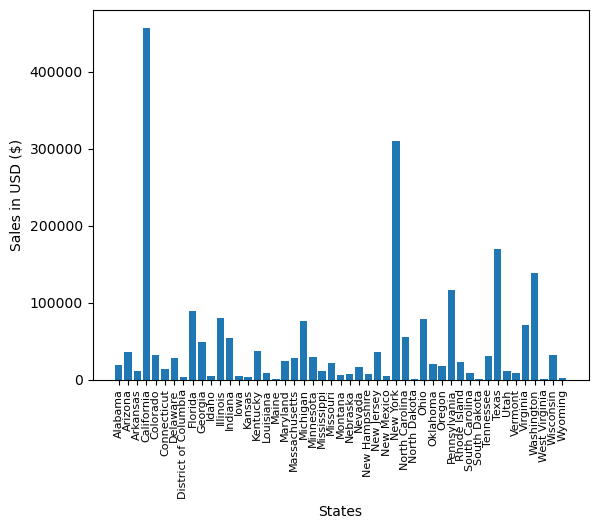

In [206]:
keys = [state for state, df in df.groupby(['State'])]

plt.bar(keys,df.groupby(['State']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('States')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

**Average time between delivery**

In [207]:

df['avg_ship_time'] = ((df['Ship Date'] - df['Order Date']).groupby([df['Ship Mode'], df['City']]).transform('mean'))
df

D:\Manha\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning:

Adding/subtracting object-dtype array to DatetimeArray not vectorized.



TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

**What Products Are Most Often Sold Together?**

In [ ]:
new_df = df[df['Order ID'].duplicated(keep=False)]

In [ ]:
#make column Product_Bundle
new_df['Product Bundle'] = new_df.groupby('Order ID')['Sub-Category'].transform(lambda x: ','.join(x))
new_df2 = new_df[['Order ID','Product Bundle']].drop_duplicates()

df.columns

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df2['Product Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


**What product sold the most? Why do you it sold the most?

In [ ]:
sub_category = df.groupby('Sub-Category')
quantity = sub_category.sum()['Quantity']

keys = [pair for pair, new_df in sub_category]
plt.bar(keys, quantity,color='#00ff55')
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.show()

In [ ]:
df['Price'] = df['Sales'] / df['Quantity']
prices = df.groupby('Sub-Category').mean()['Price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity, color='#00ff55')
ax2.plot(keys, prices, color='#008fb3')

ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Quantity Ordered', color='#00ff55')
ax2.set_ylabel('Price ($)', color='#008fb3')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

Profit/Loss Analysis

In [ ]:

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
df.groupby(by=['Sub-Category']).sum().reset_index().sort_values(['Sub-Category', 'Profit'], ascending=False).groupby('Sub-Category').head(5)

In [ ]:
#proftable category
keys = [profit for profit, df in df.groupby(['Category'])]

plt.bar(keys, df.groupby(['Category']).sum()['Profit'],color='#ff4d88')
plt.ylabel('Profit in USD ($)')
plt.xlabel('Category')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
#profit/loss in sub-category
keys = [profit for profit, df in df.groupby(['Sub-Category'])].sort_values(ascending=True)

plt.bar(keys, df.groupby(['Sub-Category']).sum()['Profit'])
plt.ylabel('Profit in USD ($)')
plt.xlabel('Sub-Category')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
xy= df.groupby('Product Name').sum()['Profit'].sort_values(ascending=False).head(5)
xy['Product Name']

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
#proftable product
keys = [proft for proft, df in df.groupby(['Product Name'])]

plt.bar(keys.head(5),xy.sort_values(ascending=False).head(5))
plt.ylabel('Profit in USD ($)')
plt.xlabel('Category')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
new_df = pd.concat([df[:5], df[-5:]], df['Product Name'])
new_df.sort_values(by=['Profit'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['Product Name'], new_df['Profit'])
plt.xticks(rotation=90) 
plt.xlabel("Animals")
plt.ylabel("Score")
plt.show()

**Which segment (consumer, corporate, home office) is generating most profit/sales separately?

In [ ]:
df.groupby('Segment').sum(['Sales'])

In [ ]:
plt.bar('Segment',df.groupby('Segment').sum(['Sales']))